<a href="https://colab.research.google.com/github/Abhaya264/Colab/blob/main/lin_reg0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# class linReg:
#   def predict(a,b,x):
#     y_pred=np.array([])
#     for i in x:
#       y_pred=np.append(y_pred,a+b*i)
#     return y_pred
# def main():
#   x=np.array([i for i in range(200)])
#   y=np.array([2*i for i in x])

#   alpha=0.0001
#   steps=2000
#   theta=[0,0]
#   for i in range(steps):
#     y_pred=linReg.predict(theta[0],theta[1],x)
#     theta[0]=theta[0]-alpha*(1/200)*np.sum(y_pred-y)
#     theta[1]=theta[1]-alpha*(1/200)*np.sum((y_pred-y)*x)
#   print(theta[0],theta[1])
#   print(x.shape,y.ndim,y_pred.ndim)
# main()

In [2]:
from google.colab import files

data=files.upload()

Saving linReg.csv to linReg.csv


In [4]:
import pandas as pd

data=pd.read_csv('linReg.csv')


In [5]:
from sklearn.model_selection import train_test_split

x=np.array(data.values[:,[0,1]])
y=np.array(data.values[:,2])
#print(y)
x=np.vstack((np.ones(len(x)),x.T)).T
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [24]:
alpha=0.0001
iter=10000
m=len(x_train)
theta=np.zeros(x_train.shape[1],dtype=float)
print(theta)
print(x_train.shape[1])

[0. 0. 0.]
3


In [25]:
def grad_desc(theta,alpha,iter,x_train,y_train):
  for i in range(iter):
    h=np.sum(np.multiply(x_train,theta),axis=-1)
    error=np.subtract(h,y_train)
    y_new=alpha*(1/m)*np.sum(np.multiply(x_train.T,error),axis=1)
    # print(h)
  # print(y_new.shape)
    theta=np.subtract(theta,y_new)
    return theta
theta=grad_desc(theta,alpha,iter,x_train,y_train)

In [26]:
k=0
print(theta)
for i in x_train:
  print(i,y_train[k],np.sum(np.multiply(i,theta)),end=" ")
  print()
  k=k+1

[0.012975   0.870275   1.04440833]
[ 1. 60. 58.] 117 112.80515833333334 
[ 1. 74. 96.] 145 164.67652500000003 
[ 1. 77. 96.] 163 167.28735 
[ 1. 68. 79.] 130 141.69993333333332 
[ 1. 60. 74.] 111 129.51569166666667 
[ 1. 76. 99.] 132 169.5503 
[ 1. 61. 90.] 120 147.0965 
[ 1. 66. 69.] 110 129.5153 
[ 1. 65. 85.] 147 145.35555833333333 
[ 1. 57. 72.] 129 124.81604999999999 
[ 1. 79. 80.] 138 152.31736666666666 
[ 1. 54. 54.] 115 103.40587500000001 


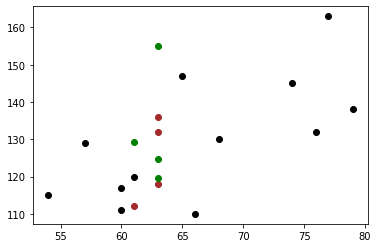

In [27]:
import matplotlib.pyplot as plt

plt.scatter(x_train[:,[1]],y_train,color='black')
plt.scatter(x_test[:,[1]],y_test,color='brown')
plt.scatter(x_test[:,[1]],np.sum(np.multiply(x_test,theta),axis=1),color='green')